# иморт библиотек

In [2]:
import pandas as pd
import numpy as np

# Загрузка данных

In [5]:
data = pd.read_csv('train.csv')

In [6]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# 1. Базовые признаки даты и времени

In [8]:
from datetime import datetime

# Функция для преобразования строки в объект datetime (если это необходимо)
def parse_datetime(date_str):
    """Парсинг строки в объект datetime"""
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')

# Функция для извлечения года
def get_year(date):
    """Извлечение года из временной метки"""
    if isinstance(date, str):
        date = parse_datetime(date)
    return date.year

# Функция для извлечения месяца
def get_month(date):
    """Извлечение месяца из временной метки"""
    if isinstance(date, str):
        date = parse_datetime(date)
    return date.month

# Функция для извлечения дня месяца
def get_day(date):
    """Извлечение дня месяца из временной метки"""
    if isinstance(date, str):
        date = parse_datetime(date)
    return date.day

# Функция для извлечения дня недели (0 - понедельник, 6 - воскресенье)
def get_day_of_week(date):
    """Извлечение дня недели из временной метки"""
    if isinstance(date, str):
        date = parse_datetime(date)
    return date.weekday()

# Функция для извлечения часа
def get_hour(date):
    """Извлечение часа из временной метки"""
    if isinstance(date, str):
        date = parse_datetime(date)
    return date.hour

# Функция для извлечения минуты
def get_minute(date):
    """Извлечение минуты из временной метки"""
    if isinstance(date, str):
        date = parse_datetime(date)
    return date.minute

# Функция для извлечения секунды
def get_second(date):
    """Извлечение секунды из временной метки"""
    if isinstance(date, str):
        date = parse_datetime(date)
    return date.second

In [12]:
data['get_year'] = data['pickup_datetime'].apply(lambda x: get_year(x))
data['get_month'] = data['pickup_datetime'].apply(lambda x: get_month(x))
data['get_day'] = data['pickup_datetime'].apply(lambda x: get_day(x))
data['get_day_of_week'] = data['pickup_datetime'].apply(lambda x: get_day_of_week(x))
data['get_hour'] = data['pickup_datetime'].apply(lambda x: get_hour(x))
data['get_minute'] = data['pickup_datetime'].apply(lambda x: get_minute(x))
data['get_second'] = data['pickup_datetime'].apply(lambda x: get_second(x))

# 2. Бинарные признаки

In [17]:
def is_weekend(date):
    """Проверка, является ли день выходным (суббота или воскресенье)"""
    if isinstance(date, str):
        date = parse_datetime(date)
    return 1 if date.weekday() >= 5 else 0

from datetime import datetime

# Основные праздники России на 2024 год
holidays = [
    datetime(2024, 1, 1).date(),  # Новый год
    datetime(2024, 1, 2).date(),  # Новогодние каникулы
    datetime(2024, 1, 3).date(),  # Новогодние каникулы
    datetime(2024, 1, 4).date(),  # Новогодние каникулы
    datetime(2024, 1, 5).date(),  # Новогодние каникулы
    datetime(2024, 1, 6).date(),  # Новогодние каникулы
    datetime(2024, 1, 7).date(),  # Рождество Христово
    datetime(2024, 1, 8).date(),  # Новогодние каникулы (продолжение)
    datetime(2024, 2, 23).date(),  # День защитника Отечества
    datetime(2024, 3, 8).date(),   # Международный женский день
    datetime(2024, 5, 1).date(),   # Праздник Весны и Труда
    datetime(2024, 5, 9).date(),   # День Победы
    datetime(2024, 6, 12).date(),  # День России
    datetime(2024, 11, 4).date(),  # День народного единства
]

# Если нужно проверить, является ли день праздничным:
def is_holiday(date, holidays=holidays):
    """Проверка, является ли день праздничным в России"""
    if isinstance(date, str):
        date = parse_datetime(date)
    return 1 if date.date() in holidays else 0

def is_rush_hour(date):
    """Проверка, является ли время в пределах часа пик (утро или вечер в будние дни)"""
    if isinstance(date, str):
        date = parse_datetime(date)
    
    # Проверяем, что это будний день (понедельник-пятница)
    if date.weekday() >= 5:  # 5 - суббота, 6 - воскресенье
        return 0
    
    # Проверяем утренний час пик (7:00 - 10:00) или вечерний час пик (17:00 - 20:00)
    if 7 <= date.hour <= 10 or 17 <= date.hour <= 20:
        return 1
    else:
        return 0

In [18]:
data['is_weekend'] = data['pickup_datetime'].apply(lambda x: is_weekend(x))
data['is_holiday'] = data['pickup_datetime'].apply(lambda x: is_holiday(x))
data['is_rush_hour'] = data['pickup_datetime'].apply(lambda x: is_rush_hour(x))

# 3. Сезонные признаки

In [19]:
# Функция для определения квартала
def get_quarter(date):
    """Определение квартала по месяцу"""
    if isinstance(date, str):
        date = parse_datetime(date)
    
    month = date.month
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [7, 8, 9]:
        return 3
    elif month in [10, 11, 12]:
        return 4

In [20]:
data['get_quarter'] = data['pickup_datetime'].apply(lambda x: get_quarter(x))

# 4. Циклические признаки

In [22]:
data['hour_sin'] = np.sin(2 * np.pi * data['get_hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['get_hour'] / 24)

# 5. Признаки временного интервала

In [23]:
def time_since_start_of_year(date):
    """Возвращает количество дней, прошедших с начала года"""
    if isinstance(date, str):
        date = parse_datetime(date)
    
    start_of_year = datetime(date.year, 1, 1)
    delta = date - start_of_year
    return delta.days

def time_since_last_event(current_date, last_event_date):
    """Возвращает количество дней, прошедших с последнего события"""
    if isinstance(current_date, str):
        current_date = parse_datetime(current_date)
    if isinstance(last_event_date, str):
        last_event_date = parse_datetime(last_event_date)
    
    delta = current_date - last_event_date
    return delta.days

# 6. Скользящие и агрегированные статистики

In [37]:
data = data.sort_values(by='pickup_datetime')

In [46]:
data['rolling_mean_trip_duration'] = data['trip_duration'].rolling(window=200, min_periods = 1).mean()

In [47]:
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,get_hour,get_minute,get_second,is_weekend,is_holiday,is_rush_hour,get_quarter,hour_sin,hour_cos,rolling_mean_trip_duration
96469,id0190469,2,2016-01-01 00:00:17,2016-01-01 00:14:26,5,-73.981743,40.719158,-73.938828,40.829182,N,...,0,0,17,0,0,0,1,0.000000,1.000000,849.000000
223872,id1665586,1,2016-01-01 00:00:53,2016-01-01 00:22:27,1,-73.985085,40.747166,-73.958038,40.717491,N,...,0,0,53,0,0,0,1,0.000000,1.000000,1071.500000
713067,id1210365,2,2016-01-01 00:01:01,2016-01-01 00:07:49,5,-73.965279,40.801041,-73.947479,40.815170,N,...,0,1,1,0,0,0,1,0.000000,1.000000,850.333333
652463,id3888279,1,2016-01-01 00:01:14,2016-01-01 00:05:54,1,-73.982292,40.751331,-73.991341,40.750340,N,...,0,1,14,0,0,0,1,0.000000,1.000000,707.750000
722901,id0924227,1,2016-01-01 00:01:20,2016-01-01 00:13:36,1,-73.970108,40.759800,-73.989357,40.742989,N,...,0,1,20,0,0,0,1,0.000000,1.000000,713.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853710,id1255468,2,2016-06-30 23:58:52,2016-07-01 00:06:44,1,-73.982750,40.745289,-73.969002,40.757950,N,...,23,58,52,0,0,0,2,-0.258819,0.965926,985.675000
419031,id2013516,1,2016-06-30 23:59:09,2016-07-01 00:11:43,2,-73.955109,40.689564,-73.978203,40.685802,N,...,23,59,9,0,0,0,2,-0.258819,0.965926,986.830000
1008720,id0376262,1,2016-06-30 23:59:10,2016-07-01 00:41:36,2,-73.873093,40.774097,-73.926704,40.856739,N,...,23,59,10,0,0,0,2,-0.258819,0.965926,994.285000
405743,id2332349,2,2016-06-30 23:59:37,2016-07-01 00:23:39,5,-73.998291,40.722618,-73.971779,40.762470,N,...,23,59,37,0,0,0,2,-0.258819,0.965926,999.835000


# Работа с геопризнаками

## 1. Признаки расстояния(до базовых точек)

In [78]:
from geopy.distance import geodesic
from tqdm import tqdm
tqdm.pandas()
# Assuming your data is in a DataFrame called 'df'

# Calculate distances
data['distance'] = data.progress_apply(lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])).miles, axis=1)

100%|██████████████████████████████████████████████████████████████████████| 1458644/1458644 [04:45<00:00, 5117.80it/s]


## 2. Кластеризация с помощью координат 

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = data[['pickup_latitude', 'pickup_longitude']]

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

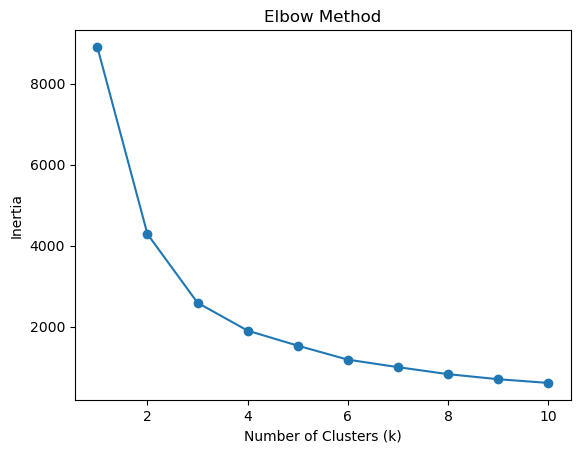

In [67]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


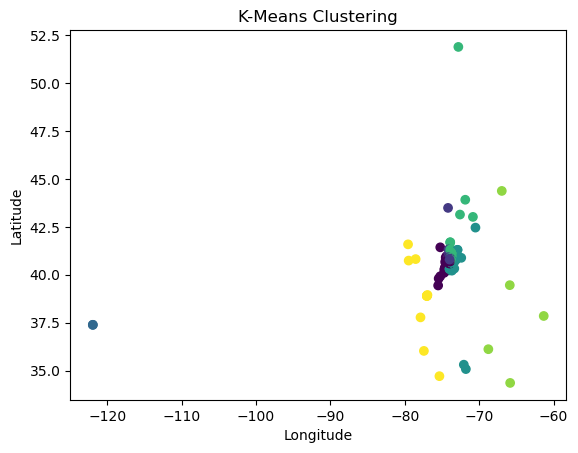

In [71]:
k = 7  

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

data['cluster'] = kmeans.labels_

plt.scatter(data['pickup_longitude'], data['pickup_latitude'], c=data['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 3. Признаки сетки (grid features)

In [77]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'

# Define grid cell size (in degrees)
grid_size = 0.1

# Create grid coordinates
data['grid_x'] = (data['pickup_longitude'] / grid_size).astype(int)
data['grid_y'] = (data['pickup_latitude'] / grid_size).astype(int)

# Combine grid coordinates into a single grid ID
data['grid_id'] = data['grid_x'].astype(str) + '_' + data['grid_y'].astype(str)

data[['pickup_latitude', 'pickup_longitude', 'grid_id']].head()

,pickup_latitude,pickup_longitude,grid_id
96469,40.719158,-73.981743,-739_407
223872,40.747166,-73.985085,-739_407
713067,40.801041,-73.965279,-739_408
652463,40.751331,-73.982292,-739_407
722901,40.759800,-73.970108,-739_407


## 4. Признаки на основе расстояния и направления

In [90]:
def get_bearing(lat1, lon1, lat2, lon2):
    dLon = lon2 - lon1
    y = np.sin(dLon) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dLon)
    brng = np.rad2deg(np.arctan2(y, x))
    if brng < 0:
        brng += 360
    return brng

# Apply the function to calculate bearings
data['azimuth'] = data.progress_apply(lambda row: get_bearing(row['pickup_latitude'], row['pickup_longitude'], 
                                                row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

100%|█████████████████████████████████████████████████████████████████████| 1458644/1458644 [00:36<00:00, 39938.85it/s]


In [86]:
data['azimuth']

96469      0
223872     0
713067     0
652463     0
722901     0
          ..
853710     0
419031     0
1008720    0
405743     0
500524     0
Name: azimuth, Length: 1458644, dtype: int64